In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import googletrans
from googletrans import Translator
import matplotlib.pyplot as plt
#https://www.kaggle.com/nikhileswarkomati/suicide-watch

# first dataset


In [2]:
with open(r'sentiment_tweets3.csv') as f:
    print(f)

<_io.TextIOWrapper name='sentiment_tweets3.csv' mode='r' encoding='cp1252'>


In [3]:
data=pd.read_csv(r'sentiment_tweets3.csv',encoding='UTF-8')
data=pd.DataFrame(data.values, columns = ["index","text",'out'])
data.head()

,index,text,out
0,106,just had a real good moment. i missssssssss hi...,0
1,217,is reading manga http://plurk.com/p/mzp1e,0
2,220,@comeagainjen http://twitpic.com/2y2lx - http:...,0
3,288,@lapcat Need to send 'em to my accountant tomo...,0
4,540,ADD ME ON MYSPACE!!! myspace.com/LookThunder,0


In [4]:
x1=data.text
y1=data.out

# second data set

In [1]:
with open(r'tweets.csv') as f:
    print(f)

<_io.TextIOWrapper name='tweets.csv' mode='r' encoding='cp1252'>


In [2]:
data2=pd.read_csv(r'tweets.csv',encoding='UTF-8')
#data2=pd.DataFrame(data2.values, columns = ["index","text",'out'])
data2.head()
#https://drive.google.com/drive/folders/1CxSwUTe3ZV449MqvrH2AWbG_9mTck_Ig

NameError: name 'pd' is not defined

In [7]:
x2=data2.tweet
y2=np.ones(x2.shape)

In [8]:
x1n=x1.to_numpy()
x2n=x2.to_numpy()
y1n=y1.to_numpy()

In [9]:
x_pre=np.concatenate((x1n,x2n))
y_pre=np.concatenate((y1n,y2))

## visualize

<BarContainer object of 2 artists>

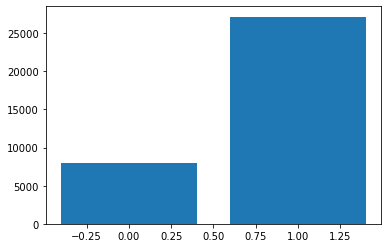

In [10]:
plt.bar([0,1],(np.count_nonzero(y_pre==0),np.count_nonzero(y_pre==1)))

In [11]:
np.count_nonzero(y_pre==1)-np.count_nonzero(y_pre==0)

19176

# dataset 3 only for happy texts

### target: the polarity of the tweet (0 = negative, 2 = neutral, 4 = positive)

In [12]:
data3=pd.read_csv(r'archive\training.1600000.processed.noemoticon.csv',encoding='cp1252')
#data = data.rename(columns={'0': 'sent'}) #rename first colum to sent
data3=pd.DataFrame(data3.values, columns = ["sent", "dc1", "dc2","dc3","dc4","text"])
data3= data3[data3.sent != 2] #drop neutrals
x3=data3.text
y3=data3.sent
y3[y3 == 4] = 1

In [13]:
count=0
for l in range(y3.shape[0]):
    if y3[l]==1:
        count=count+1
        x_pre=np.append(x_pre,x3[l])
        y_pre=np.append(y_pre,0)
    if count==19176:
        break

<BarContainer object of 2 artists>

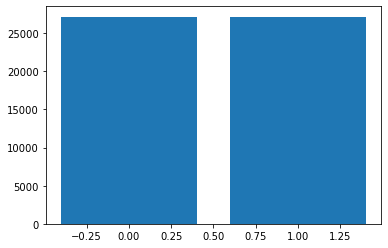

In [14]:
plt.bar([0,1],(np.count_nonzero(y_pre==0),np.count_nonzero(y_pre==1)))

In [15]:
zeros=[]
unos=[]
unos_cn_dep=0
unos_sn_dep=0
for l in range(x_pre.shape[0]):
    if y_pre[l]==0:
        a_string=x_pre[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        zeros.append(number_of_words)
            
    else:
        a_string=x_pre[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        unos.append(number_of_words)
        dep=False
        for x in word_list:
            if "depression" in x or "Depression" in x:
                unos_cn_dep=unos_cn_dep+1
                dep=True
                break
        if dep==False:
            unos_sn_dep=unos_sn_dep+1
            


In [16]:
list_setz = list(set(zeros))
valoresz=[]
for x in list_setz:
    num=zeros.count(x)
    valoresz.append(num)
    
list_setu= list(set(unos))
valoresu=[]
for x in list_setu:
    num=unos.count(x)
    valoresu.append(num)

<BarContainer object of 34 artists>

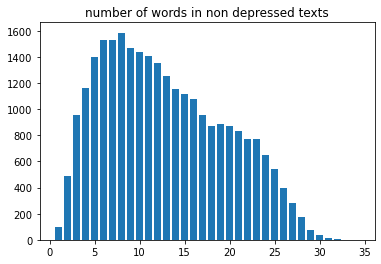

In [17]:
plt.title('number of words in non depressed texts')
plt.bar(list_setz,valoresz)

<BarContainer object of 70 artists>

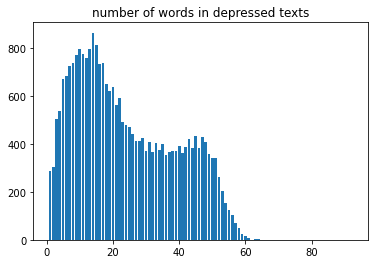

In [18]:
plt.title('number of words in depressed texts')
plt.bar(list_setu,valoresu)

<BarContainer object of 2 artists>

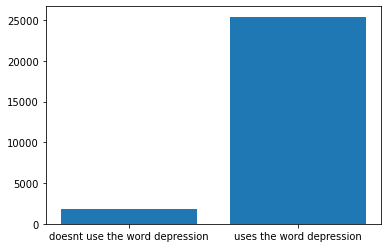

In [19]:
plt.bar(['doesnt use the word depression','uses the word depression'],(unos_sn_dep,unos_cn_dep))

In [29]:
with open(r'Tweets_depre/tweets_final_1_clean.csv') as f:
    print(f)

<_io.TextIOWrapper name='Tweets_depre/tweets_final_1_clean.csv' mode='r' encoding='cp1252'>


# Dataset 4 nivelating the depression word

In [ ]:
#https://github.com/swcwang/depression-detection

In [39]:
xl=np.empty((1,))
yl=np.empty((1,))
for filename in os.listdir('Tweets_depre'):  
    file=r'Tweets_depre/'+filename
    df=pd.read_csv(file,encoding="cp1252")
    x_d=df.tweet_processed.to_numpy()
    y_d=df.target.to_numpy()
    xl=np.concatenate((xl,x_d))
    yl=np.concatenate((yl,y_d))
xl=xl[1:]
yl=yl[1:]

In [42]:
zeros=[]
unos=[]
unos_cn_dep=0
unos_sn_dep=0
for l in range(xl.shape[0]):
    if yl[l]==0:
        a_string=xl[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        zeros.append(number_of_words)
            
    else:
        a_string=xl[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        unos.append(number_of_words)
        dep=False
        for x in word_list:
            if "depression" in x or "Depression" in x:
                unos_cn_dep=unos_cn_dep+1
                dep=True
                break
        if dep==False:
            unos_sn_dep=unos_sn_dep+1

<BarContainer object of 2 artists>

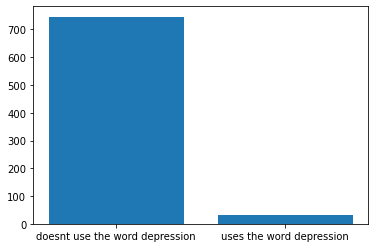

In [43]:
plt.bar(['doesnt use the word depression','uses the word depression'],(unos_sn_dep,unos_cn_dep))

<BarContainer object of 2 artists>

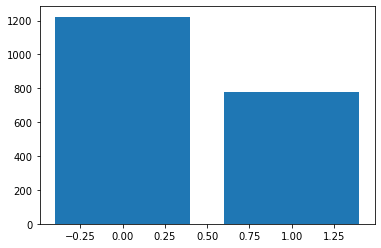

In [44]:
plt.bar([0,1],(np.count_nonzero(yl==0),np.count_nonzero(yl==1)))

In [78]:
import random
xt=[]
yt=[]
for u in range(1000):
    elejido=random.randint(0, x_pre.shape[0])
    xt.append(x_pre[elejido])
    yt.append(y_pre[elejido])
xt=np.array(xt)
yt=np.array(yt)
x_pre2=np.concatenate((xl,xt))
y_pre2=np.concatenate((yl,yt))
y_pre2=y_pre2.astype(int)

In [79]:
bert_df = pd.DataFrame({
    'id': range(len(x_pre2)),
    'label': y_pre2,
    'alpha': ['q']*x_pre2.shape[0],
    'text': x_pre2
})
train_pre,test= train_test_split(bert_df)
dev_bert_df,train_bert_df=train_test_split(train_pre)
test_bert_df=test.drop(columns=['label', 'alpha'])
train_bert_df.to_csv('data/train.tsv', sep='\t', index=False, header=False)
dev_bert_df.to_csv('data/dev.tsv', sep='\t', index=False, header=False)
test_bert_df.to_csv('data/test.tsv', sep='\t', index=False, header=False)

In [82]:
#full dataset
df = pd.DataFrame({
    'id': range(len(x_pre2)),
    'label': y_pre2,
    'text': x_pre2
})
df.to_csv('data/Fulldata2.csv', index=False, header=True)

# Data 2 visualizacion

In [11]:
datax=pd.read_csv(r'Data\Fulldata2.csv')
datax.head()
x_pre3=datax.text.to_numpy()
y_pre3=datax.label.to_numpy()

<BarContainer object of 2 artists>

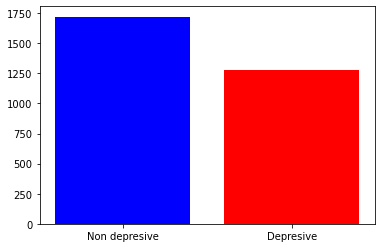

In [16]:
plt.bar(['Non depresive','Depresive'],(np.count_nonzero(y_pre3==0),np.count_nonzero(y_pre3==1)),color=['b','r'])

In [19]:
zeros=[]
unos=[]
unos_cn_dep=0
unos_sn_dep=0
for l in range(x_pre3.shape[0]):
    if y_pre3[l]==0:
        a_string=x_pre3[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        zeros.append(number_of_words)
            
    else:
        a_string=x_pre3[l]
        word_list = a_string.split()
        number_of_words = len(word_list)
        unos.append(number_of_words)
        dep=False
        for x in word_list:
            if "depression" in x or "Depression" in x:
                unos_cn_dep=unos_cn_dep+1
                dep=True
                break
        if dep==False:
            unos_sn_dep=unos_sn_dep+1

In [21]:
list_setz = list(set(zeros))
valoresz=[]
for x in list_setz:
    num=zeros.count(x)
    valoresz.append(num)
    
list_setu= list(set(unos))
valoresu=[]
for x in list_setu:
    num=unos.count(x)
    valoresu.append(num)

<BarContainer object of 49 artists>

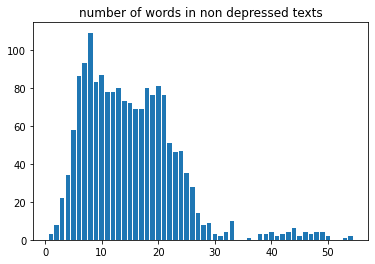

In [24]:
plt.title('number of words in non depressed texts')
plt.bar(list_setz,valoresz)

<BarContainer object of 60 artists>

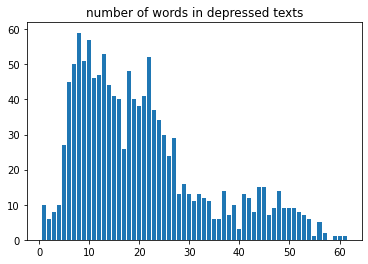

In [22]:
plt.title('number of words in depressed texts')
plt.bar(list_setu,valoresu)

<BarContainer object of 2 artists>

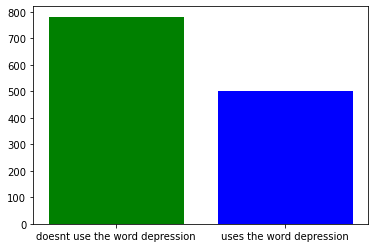

In [25]:
plt.bar(['doesnt use the word depression','uses the word depression'],(unos_sn_dep,unos_cn_dep),color=['green','blue'])

# Data augmentation via translation, not needed anymore

translator = Translator()

for x in range(y_pre.shape[0]):
    if y_pre[x] == 1:
        texto=x_pre[x]
        print(x)
        #japanese
        result_trans = translator.translate(text=texto, src='en', dest='ja')
        result_back= translator.translate(text=result_trans.text , src='ja', dest='en')
        x_pre=np.append(x_pre,result_back.text)
        y_pre=np.append(y_pre,1)
        #korean
        result_trans = translator.translate(text=texto, src='en', dest='ko')
        result_back= translator.translate(text=result_trans.text , src='ko', dest='en')
        x_pre=np.append(x_pre,result_back.text)
        y_pre=np.append(y_pre,1)
        #rusian
        result_trans = translator.translate(text=texto, src='en', dest='ru')
        result_back= translator.translate(text=result_trans.text , src='ru', dest='en')
        x_pre=np.append(x_pre,result_back.text)
        y_pre=np.append(y_pre,1)
      

unique, counts = np.unique(y_pre, return_counts=True)
print(dict(zip(unique, counts)))

# Data preaparation for bert

In [84]:
for x in range(len(y_pre)):
    y_pre[x]=int(y_pre[x])
    

In [85]:
#full dataset
df = pd.DataFrame({
    'id': range(len(x_pre)),
    'label': y_pre,
    'text': x_pre
})
df.to_csv('data/Fulldata.csv', index=False, header=True)

In [ ]:
bert_df = pd.DataFrame({
    'id': range(len(x_pre)),
    'label': y_pre,
    'alpha': ['q']*x_pre.shape[0],
    'text': x_pre
})

In [ ]:
train_pre,test= train_test_split(bert_df)
dev_bert_df,train_bert_df=train_test_split(train_pre)

In [ ]:
test_bert_df=test.drop(columns=['label', 'alpha'])

In [ ]:
train_bert_df.to_csv('data/train.tsv', sep='\t', index=False, header=False)
dev_bert_df.to_csv('data/dev.tsv', sep='\t', index=False, header=False)
test_bert_df.to_csv('data/test.tsv', sep='\t', index=False, header=False)

# Metricas

In [93]:
dataz=pd.read_csv(r'vali\test_results.tsv',sep='\t',header=None)
dataz=pd.DataFrame(dataz.values, columns = ["z",'u'])
zero=dataz.z.to_numpy()
uno=dataz.u.to_numpy()

In [94]:
dataz.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   z       749 non-null    float64
 1   u       749 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


In [95]:
datay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750 entries, 0 to 749
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      750 non-null    object
 1   text    750 non-null    object
dtypes: object(2)
memory usage: 11.8+ KB


In [96]:
datay=pd.read_csv(r'vali\test.tsv',sep='\t',header=None)
datay=pd.DataFrame(datay.values, columns = ["id",'text'])
datay.head()
ide=datay.id.to_numpy()
text1=datay.text.to_numpy()
ide=ide[1:]
text1=text1[1:]

In [97]:
datax=pd.read_csv(r'Data\Fulldata2.csv')
datax.head()
label_r=datax.label.to_numpy()
text2=datax.text.to_numpy()

In [98]:
y_real=[]
count=0
for x in ide:
    assert text1[count]==text2[x]
    y_real.append(label_r[x])
    count=count+1

In [110]:
y_pred=[]
for l in range(len(uno)):
    if zero[l]>uno[l]:
        y_pred.append(0)
    else:
        y_pred.append(1)
        

In [111]:
y_true=y_real
y_pred=y_pred

In [112]:
y_true=np.array(y_true)
y_pred=np.array(y_pred)

In [113]:
y_true=y_true.astype(int)
y_pred=y_pred.astype(int)

In [1]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score


In [118]:
confusion_matrix(y_true, y_pred)

array([[349,  90],
       [ 85, 225]], dtype=int64)